In [4]:
import matplotlib as plt
import pandas as pd
import numpy as np
import keras
from tqdm import tqdm
from keras.preprocessing import image
import matplotlib 
from matplotlib import pyplot as plt
import os
import cv2

In [5]:
data = []
labels = []
classes = 43
cur_path = 'Train'

for i in tqdm(os.listdir(cur_path)):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (64,64), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:07<00:00,  5.66it/s]

(39209, 64, 64, 3) (39209,)


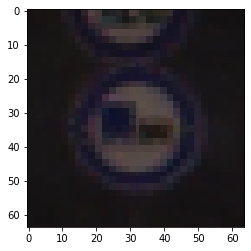

In [6]:
plt.imshow(data[3907])

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [11]:
import tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.25, random_state=21)

print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

# converting the labels into one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

((29406, 64, 64, 3), (29406,)) ((9803, 64, 64, 3), (9803,))


In [13]:
model = Sequential()
#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(64,64,3), activation='relu', kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,), activation='relu'))

#2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

#3rd Fully Connected Layer
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation='relu'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 16, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 384)         885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 256)        

In [14]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #CCE: For Multiclass problems
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 16, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 384)         885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 256)        

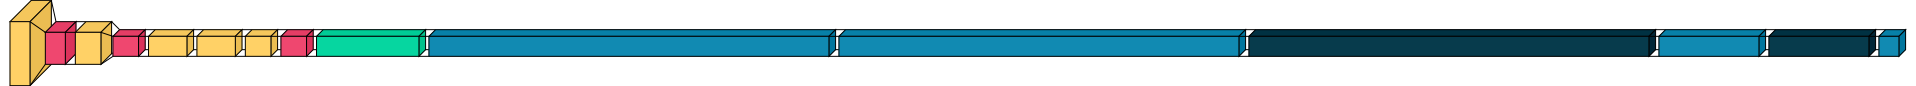

In [15]:
import visualkeras
visualkeras.layered_view(model)

In [16]:
epochs = 15
history = model.fit(x_train, y_train, 
                   batch_size=64,
                   epochs=epochs,
                   validation_data=(x_test, y_test))
    
    

Epoch 1/15
460/460 [==============================] - 202s 412ms/step - loss: 7.2325 - accuracy: 0.0514 - val_loss: 6.7107 - val_accuracy: 0.0548
Epoch 2/15
460/460 [==============================] - 190s 413ms/step - loss: 6.6617 - accuracy: 0.0543 - val_loss: 6.7068 - val_accuracy: 0.0548
Epoch 3/15
282/460 [=================>............] - ETA: 1:10 - loss: 6.6338 - accuracy: 0.0595

KeyboardInterrupt: 

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('lenet_model')

In [ ]:
y_test = pd.read_csv('Test.csv')

In [ ]:
labels_test = y_test['ClassId'].values
img_test = y_test['Path'].values
test_dir = ''
data = []
for img in img_test:
    img_path = os.path.join(test_dir, img)
    image = cv2.imread(img_path, -1)
    image = cv2.resize(image, (64,64), interpolation = cv2.INTER_NEAREST)
    data.append(np.array(image))
X_test = np.array(data)

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict_classes(X_test)

print("Test accuracy: ", accuracy_score(labels_test, pred) * 100 )